<a href="https://colab.research.google.com/github/SayyedAsifRizvi/SayyedAsifRizvi/blob/main/Walmart_case_study_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.Objective**

The objective of this project is to conduct a comprehensive analysis of customer purchase behavior, with a specific focus on purchase amounts, in relation to customer gender during the Black Friday sales event at Walmart Inc. This study aims to provide valuable insights that can assist the management team at Walmart Inc. in making data-driven decisions.

**About Data**

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday.It has information of about 0.5 Million transactions during Black Friday throughout various years.

**Features of the dataset:**

**User_ID**: User ID of the Customer

**Product ID**:	Product ID of the Purchased Product

**Gender**:	Gender of the Customer (Male/Female)

**Age**: 	Age of the Customer (in bins)

**Occupation**:	Occupation of the Customer (Masked)

**City_Category**:	Category of the City (A,B,C)

**StayInCurrentCityYears**:	Number of years stay in current city

**Marital_Status**:	Marital Status (0 - Unmarried / 1 - Married)

**ProductCategory**:	Product Category (Masked)

**Purchase**:	Purchase Amount

# **2. Exploratory Data Analysis**

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t
import warnings
warnings.filterwarnings('ignore')
import copy

In [3]:
# loading the dataset
df = pd.read_csv('/content/walmart_data.csv')

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,7969.0


In [5]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
25032,1003843,P00034642,F,0-17,10.0,B,2,0.0,4.0,1433.0
25033,1003844,P00359942,M,18-25,4.0,C,3,1.0,11.0,6138.0
25034,1003844,P00193842,M,18-25,4.0,C,3,1.0,11.0,7477.0
25035,1003845,P00110942,M,26-35,12.0,C,1,1.0,1.0,19456.0
25036,1003845,P0022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(25037, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25037 entries, 0 to 25036
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     25037 non-null  int64  
 1   Product_ID                  25037 non-null  object 
 2   Gender                      25036 non-null  object 
 3   Age                         25036 non-null  object 
 4   Occupation                  25036 non-null  float64
 5   City_Category               25036 non-null  object 
 6   Stay_In_Current_City_Years  25036 non-null  object 
 7   Marital_Status              25036 non-null  float64
 8   Product_Category            25036 non-null  float64
 9   Purchase                    25036 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 1.9+ MB


**Insights**

>From the above analysis, it is clear that, data has total of 10 features with lots of mixed alpha numeric data.

>Apart from Purchase Column, all the other data types are of categorical type. We will change the datatypes of all such columns to category

** Changing the Datatype of Columns**





In [8]:
for i in df.columns[:-1]:
    df[i] = df[i].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25037 entries, 0 to 25036
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   User_ID                     25037 non-null  category
 1   Product_ID                  25037 non-null  category
 2   Gender                      25036 non-null  category
 3   Age                         25036 non-null  category
 4   Occupation                  25036 non-null  category
 5   City_Category               25036 non-null  category
 6   Stay_In_Current_City_Years  25036 non-null  category
 7   Marital_Status              25036 non-null  category
 8   Product_Category            25036 non-null  category
 9   Purchase                    25036 non-null  float64 
dtypes: category(9), float64(1)
memory usage: 709.1 KB


**Statistical Summary**

In [9]:
df.describe(include = 'category')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,25037,25037,25036,25036,25036.0,25036,25036,25036.0,25036.0
unique,3388,2821,2,7,21.0,3,5,2.0,18.0
top,1001680,P00025442,M,26-35,4.0,B,1,0.0,5.0
freq,88,90,19139,9826,3466.0,10609,8687,15033.0,7033.0


Satistical summary of object type columns

1.   Li1. User_ID - Among 5,50,068 transactions there are 5891 unique user_id, indicating same customers buying multiple products.

2. Product_ID - Among 5,50,068 transactions there are 3631 unique products,with the product having the code P00265242 being the highest seller, with a maximum of 1,880 units sold.

3. Gender - Out of 5,50,068 transactions, 4,14,259 (nearly 75%) were done by male gender indicating a significant disparity in purchase behavior between males and females during the Black Friday event.

4. Age - We have 7 unique age groups in the dataset. 26 - 35 Age group has maximum of 2,19,587 transactions. We will analyse this feature in detail in future

5. Stay_In_Current_City_Years - Customers with 1 year of stay in current city accounted to maximum of 1,93,821 transactions among all the other customers with (0,2,3,4+) years of stay in current city

6. Marital_Status - 59% of the total transactions were done by Unmarried Customers and 41% by Married Customers.st item




**Satistical summary of numerical data type columns**

In [10]:
df.describe()

,Purchase
count,25036.000000
mean,9240.939647
std,4937.285195
min,186.000000
25%,5837.750000
50%,8044.000000
75%,11997.500000
max,23958.000000


The purchase amounts vary widely, with the minimum recorded purchase being 12
 and the maximum reaching 23961. The median purchase amount of $8047 is notably lower than the mean purchase amount of 9264, indicating a right-skewed distribution where a few high-value purchases pull up the mean

**Duplicate Detection**

In [11]:
df.duplicated().value_counts()

,count
False,25037


There are no duplicate entries in the dataset

 **Sanity Check for columns**

In [12]:
# checking the unique values for columns
for i in df.columns:
    print('Unique Values in',i,'column are :-')
    print(df[i].unique())
    print('-'*70)

Unique Values in User_ID column are :-
[1000001, 1000002, 1000003, 1000004, 1000005, ..., 1003841, 1003842, 1003843, 1003844, 1003845]
Length: 3388
Categories (3388, int64): [1000001, 1000002, 1000003, 1000004, ..., 1003842, 1003843, 1003844, 1003845]
----------------------------------------------------------------------
Unique Values in Product_ID column are :-
['P00069042', 'P00248942', 'P00087842', 'P00085442', 'P00285442', ..., 'P00333542', 'P00354042', 'P00229142', 'P00359942', 'P0022']
Length: 2821
Categories (2821, object): ['P00000142', 'P00000242', 'P00000342', 'P00000442', ..., 'P0099642',
                            'P0099742', 'P0099842', 'P0099942']
----------------------------------------------------------------------
Unique Values in Gender column are :-
['F', 'M', NaN]
Categories (2, object): ['F', 'M']
----------------------------------------------------------------------
Unique Values in Age column are :-
['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25', Na

*Insights*

The dataset does not contain any abnormal values.

We will convert the 0,1 in Marital Status column as married and unmarried

In [13]:
#replacing the values in marital_status column

df['Marital_Status'] = df['Marital_Status'].replace({0:'Unmarried',1:'Married'})
df['Marital_Status'].unique()

['Unmarried', 'Married', NaN]
Categories (2, object): ['Unmarried', 'Married']

**Missing Value Analysis**

In [14]:
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,1
Age,1
Occupation,1
City_Category,1
Stay_In_Current_City_Years,1
Marital_Status,1
Product_Category,1
Purchase,1


*Insights*

The dataset does not contain any missing values.

# **3.Univariate Analysis**

*Purchase Amount*

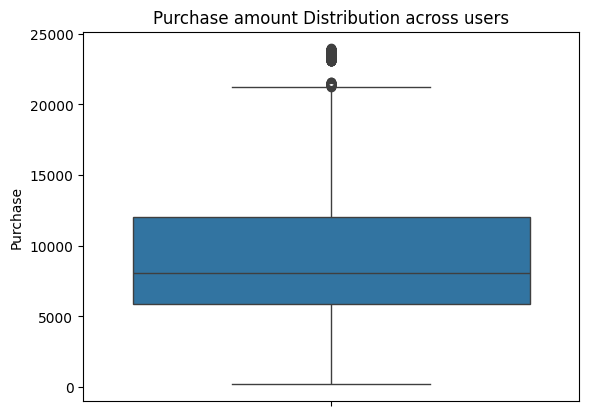

In [16]:
sns.boxplot(data=df, y='Purchase', orient='h')
plt.title("Purchase amount Distribution across users")
plt.show()

Observations: From the above box plot, we can see the purchase amount has outliers

In [17]:
#distribution of Gender
df["Gender"].value_counts(normalize=True)

,proportion
Gender,
M,0.764459
F,0.235541



observations: given data set has higher male users.

In [19]:
#distribution of Age
df["Age"].value_counts(normalize=True)

,proportion
Age,
26-35,0.392475
18-25,0.203707
36-45,0.193282
46-50,0.073654
51-55,0.069420
55+,0.039543
0-17,0.027920


Observation: 26-35 year age group has higher contribution in the users

In [20]:
#distribution of City_Category
df["City_Category"].value_counts(normalize=True)

,proportion
City_Category,
B,0.423750
C,0.297851
A,0.278399


Observations: City category B has higher users.

In [21]:
#distribution of Marital_Status
df["Marital_Status"].value_counts(normalize=True)

,proportion
Marital_Status,
Unmarried,0.600455
Married,0.399545


Observation: unmarried users are more as compared to married users

In [22]:
#distribution of Product_Category
df["Product_Category"].value_counts(normalize=True)

,proportion
Product_Category,
5.0,0.280915
1.0,0.253355
8.0,0.211216
11.0,0.046932
2.0,0.042499
3.0,0.037266
6.0,0.037147
4.0,0.020930
16.0,0.016856


Observations: product category 5 has higher contributions

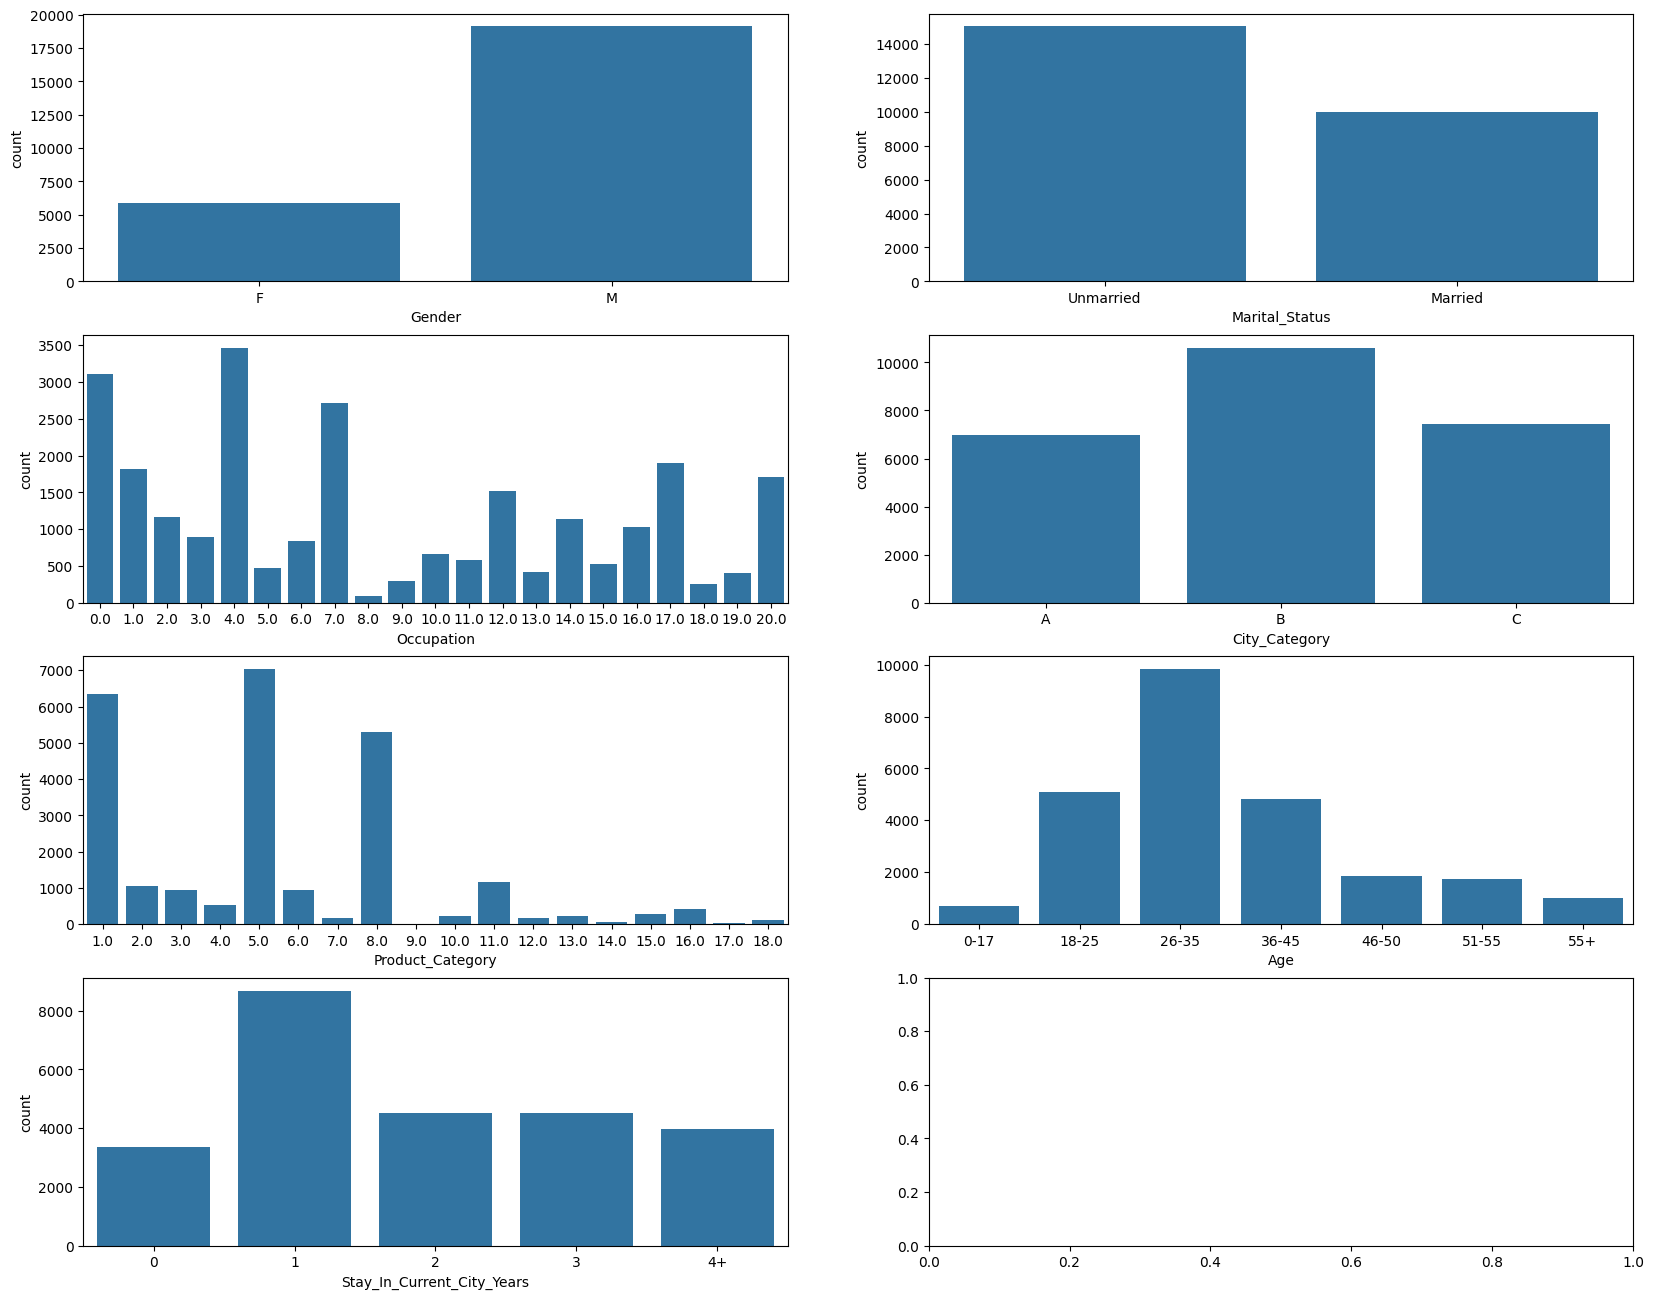

In [23]:
#mapping univariate plots for differnt metrics to see their distribution in the data
figure, axis = plt.subplots(nrows=4, ncols=2, figsize=(20, 16))
sns.countplot(data=df, x='Gender', ax=axis[0,0])
sns.countplot(data=df, x='Marital_Status', ax=axis[0,1])
sns.countplot(data=df, x='Occupation', ax=axis[1,0])
sns.countplot(data=df, x='City_Category', ax=axis[1,1])
sns.countplot(data=df, x='Product_Category', ax=axis[2,0])
sns.countplot(data=df, x='Age', ax=axis[2,1])
sns.countplot(data=df, x='Stay_In_Current_City_Years', ax=axis[3,0])
plt.show()

Observations: From the above chart we can clearly see more users are Single as compare to Married, users with 1 year stay in current city are higher.

# Bivariate and Multivariate Analysis

<Axes: xlabel='Gender', ylabel='Purchase'>

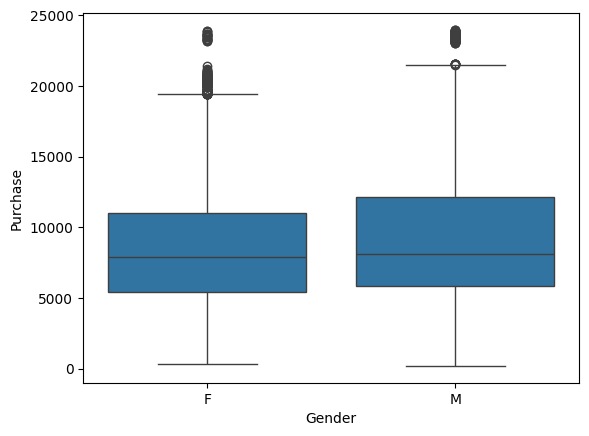

In [25]:
#Bi-variate Analysis for Purchase vs Genders
sns.boxplot(data=df, y='Purchase', x='Gender')

Observation: From the above plot we can clearly infer, male has overall higher purchase amount.

<Axes: xlabel='City_Category', ylabel='Purchase'>

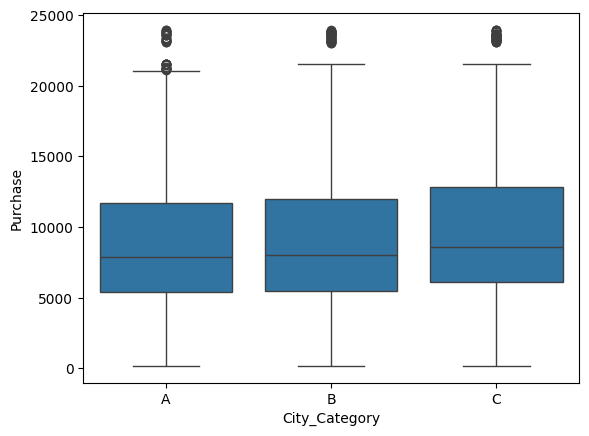

In [27]:
#Bi-variate Analysis for Purchase vs Genders
sns.boxplot(data=df, y='Purchase', x='City_Category')

Observation: From the above plot we can clearly infer, city category "C" has overall higher purchase amount.

<Axes: xlabel='Gender', ylabel='Purchase'>

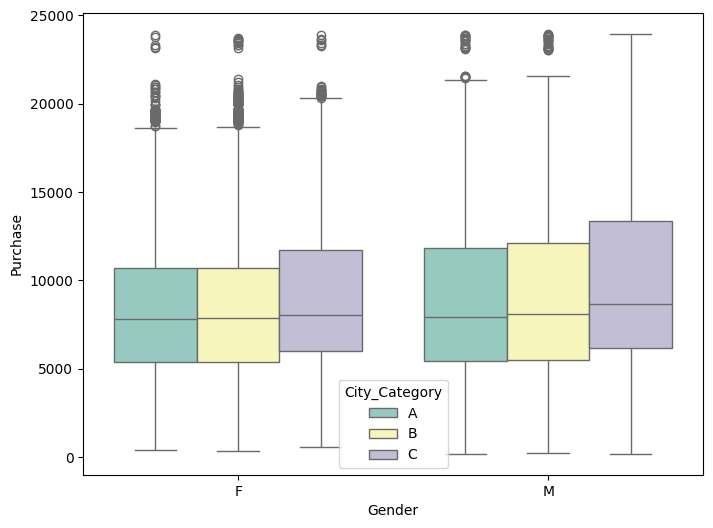

In [28]:
#correlation between Purchase, Gender and City_Category
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Purchase', x='Gender', hue='City_Category', palette='Set3')

Observations: For both male and female users City Category "C" has highest purchase value.


<Axes: xlabel='Gender', ylabel='Purchase'>

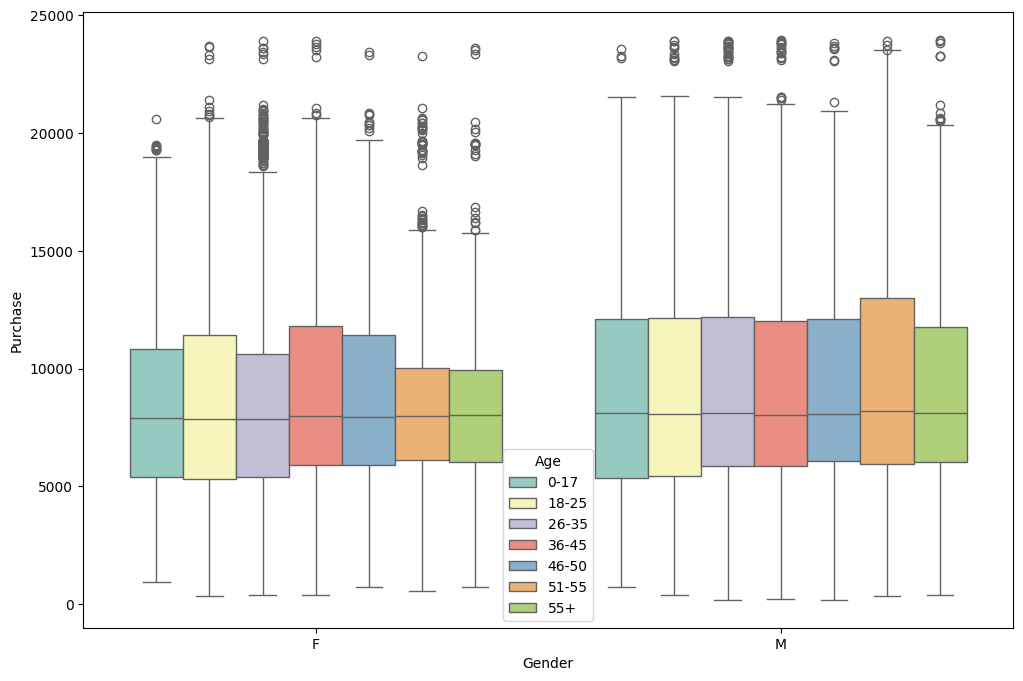

In [29]:
#correlation between Purchase, Gender and Age
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Age', palette='Set3')

Observations: For male users 51-55 years age group has higher puchase value and for female users 36-45 years age group has highest purchase value

In [30]:
cols = ['Occupation', 'Marital_Status', 'Product_Category']
df[cols] = df[cols].astype('object')

In [36]:
# Identify columns with 'category' dtype and convert them to 'object'
for col in df.select_dtypes(include='category').columns:
    df[col] = df[col].astype('object')



Purchase trend across Gender

In [41]:
#unique users distribution across Gender
amt_df = df.groupby(['User_ID', 'Gender'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df['Gender'].value_counts()

,count
Gender,
M,2482
F,906


In [42]:
#population average of purchase amount for male users
male_avg = amt_df[amt_df['Gender']=='M']['Purchase'].mean().round(2)
male_avg

72471.24

In [43]:
#population average of purchase amount for Female users
female_avg = amt_df[amt_df['Gender']=='F']['Purchase'].mean().round(2)
female_avg

56823.99

Observations: Male users spend more money than female users.

In [44]:
male_df = amt_df[amt_df['Gender']=='M']
female_df = amt_df[amt_df['Gender']=='F']

In [45]:
# Taking a sample size of 3000 for male and 1500 for female users and simulating it for 1000 times
male_sample_size = 3000
female_sample_size = 1500
num_repitions = 1000
male_means = []
female_means = []

for _ in range(num_repitions):
  male_mean = male_df.sample(male_sample_size, replace=True)['Purchase'].mean()
  female_mean = female_df.sample(female_sample_size, replace=True)['Purchase'].mean()
  male_means.append(male_mean)
  female_means.append(female_mean)
print("Sample means of amount spend for Male in a sample size of 3000: {:.2f}".format(np.mean(male_means)))
print("Sample means of amount spend for Female in a sample size of 1500: {:.2f}".format(np.mean(female_means)))

print("Male - Population mean: {:.2f} Population std dev: {:.2f}".format(male_df['Purchase'].mean(), male_df['Purchase'].std()))
print("Female - Population mean: {:.2f} Population std dev: {:.2f}".format(female_df['Purchase'].mean(), female_df['Purchase'].std()))

Sample means of amount spend for Male in a sample size of 3000: 72456.46
Sample means of amount spend for Female in a sample size of 1500: 56903.15
Male - Population mean: 72471.24 Population std dev: 77679.49
Female - Population mean: 56823.99 Population std dev: 65526.13


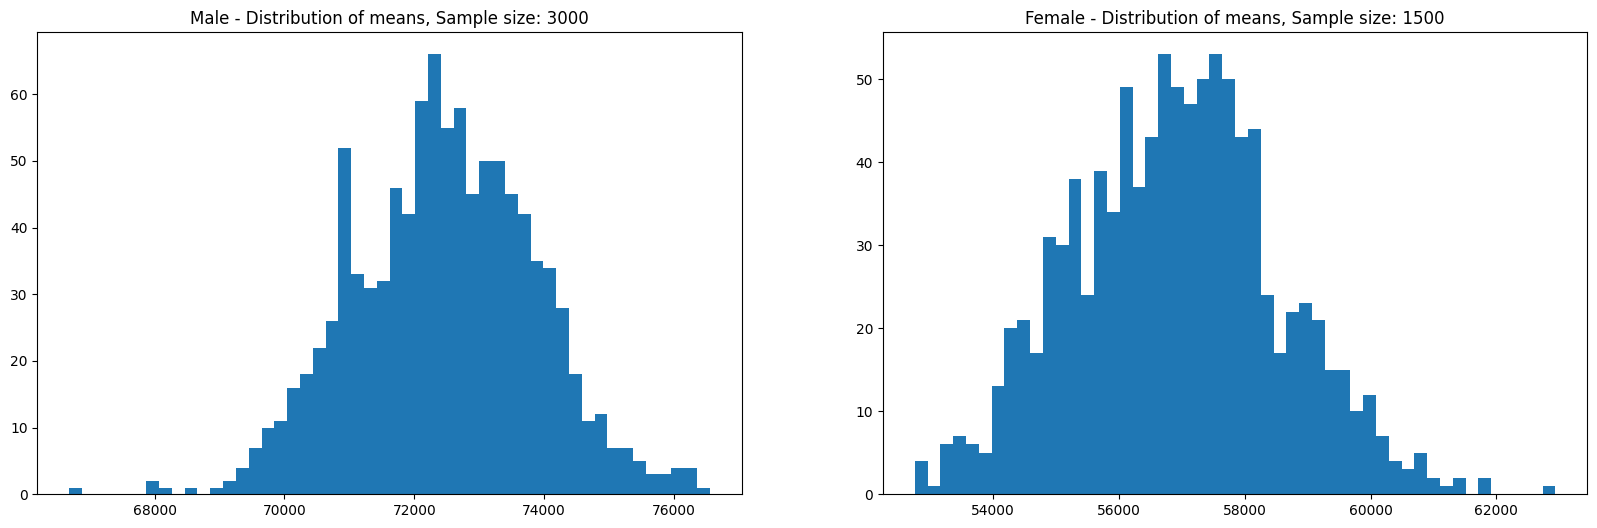

In [46]:
#Distribution of samples
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(male_means, bins=50)
axis[0].set_title("Male - Distribution of means, Sample size: 3000")
axis[1].hist(female_means, bins=50)
axis[1].set_title("Female - Distribution of means, Sample size: 1500")
plt.show()

Observation: From CLT, we can infer for the sample population that:

*   Average amount spend by male customers is 72456.46
*   Average amount spend by female customers is 56903.15











In [47]:
#range for 95% Confidence Interval for male users
male_margin_of_error_clt = 1.96*male_df['Purchase'].std()/np.sqrt(len(male_df))
male_sample_mean = male_df['Purchase'].mean()
male_lower_lim = male_sample_mean - male_margin_of_error_clt
male_upper_lim = male_sample_mean + male_margin_of_error_clt
print("Male 95% confidence interval of means: ({:.2f}, {:.2f})".format(male_lower_lim, male_upper_lim))


Male 95% confidence interval of means: (69415.19, 75527.30)


In [48]:
#range for 95% Confidence Interval for female users
female_margin_of_error_clt = 1.96*female_df['Purchase'].std()/np.sqrt(len(female_df))
female_sample_mean = female_df['Purchase'].mean()
female_lower_lim = female_sample_mean - female_margin_of_error_clt
female_upper_lim = female_sample_mean + female_margin_of_error_clt
print("Female 95% confidence interval of means: ({:.2f}, {:.2f})".format(female_lower_lim, female_upper_lim))

Female 95% confidence interval of means: (52557.15, 61090.83)


Observations: From above we can infer about the population that, 95% of the times:

* Average amount spend by male customer will lie in between: (69415.19, 75527.30)

* Average amount spend by female customer will lie in between: (52557.15, 61090.83)

We can clearly see that confidence intervals of average male and female spending is not overlapping and average male spending is higher than female.

***Purchase Trend across Marital_Status***

In [49]:
#unique users distribution across Marital_Status
amt_df = df.groupby(['User_ID', 'Marital_Status'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df['Marital_Status'].value_counts()

,count
Marital_Status,
Unmarried,1988
Married,1400


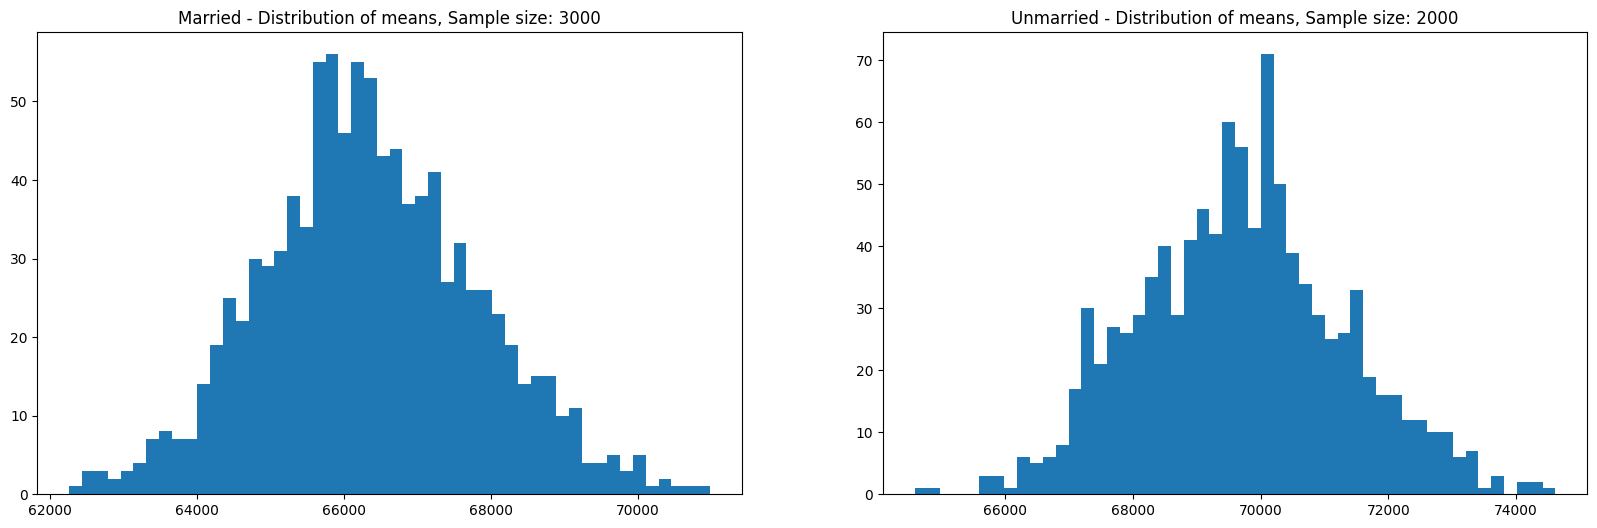

In [53]:
# Taking a sample size of 3000 for Married and 2000 for Unmarried users and simulating it for 1000 times

marid_samp_size = 3000
unmarid_sample_size = 2000
num_repitions = 1000
marid_means = []
unmarid_means = []

for _ in range(num_repitions):
    marid_mean = amt_df[amt_df['Marital_Status']=="Married"].sample(marid_samp_size, replace=True)['Purchase'].mean()
    unmarid_mean = amt_df[amt_df['Marital_Status']=="Unmarried"].sample(unmarid_sample_size, replace=True)['Purchase'].mean()

    marid_means.append(marid_mean)
    unmarid_means.append(unmarid_mean)


fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(marid_means, bins=50)
axis[0].set_title("Married - Distribution of means, Sample size: 3000")
axis[1].hist(unmarid_means, bins=50)
axis[1].set_title("Unmarried - Distribution of means, Sample size: 2000")
plt.show()

In [56]:
print("Sample means of amount spend for Married in a sample size of 3000: {:.2f}".format(np.mean(marid_means)))
print("Sample means of amount spend for Unmarried in a sample size of 2000: {:.2f}".format(np.mean(unmarid_means)))

print("Married - Population mean: {:.2f} Population std: {:.2f}".format(amt_df[amt_df['Marital_Status']=="Married"]['Purchase'].mean(), amt_df[amt_df['Marital_Status']=="Married"]['Purchase'].std()))
print("Unmarried - Population mean: {:.2f} Population std: {:.2f}".format(amt_df[amt_df['Marital_Status']=="Unmarried"]['Purchase'].mean(), amt_df[amt_df['Marital_Status']=="Unmarried"]['Purchase'].std()))

Sample means of amount spend for Married in a sample size of 3000: 66354.53
Sample means of amount spend for Unmarried in a sample size of 2000: 69685.67
Married - Population mean: 66360.11 Population std: 75285.08
Unmarried - Population mean: 69643.87 Population std: 74676.68


Observation: From CLT, we can infer for the sample population that:

* Average amount spend by Married customers is 663600.11
* Average amount spend by Unmarried customers is 69643.87

In [57]:
ms_df = df.groupby(['User_ID', 'Marital_Status'])[['Purchase']].sum()
ms_df = ms_df.reset_index()

In [59]:
married_df = ms_df[ms_df['Marital_Status']=="Married"]
unmarried_df = ms_df[ms_df['Marital_Status']=="Unmarried"]

In [60]:
#range for 95% Confidence Interval for Married users
married_margin_of_error_clt = 1.96*married_df['Purchase'].std()/np.sqrt(len(married_df))
married_sample_mean = married_df['Purchase'].mean()
married_lower_lim = married_sample_mean - married_margin_of_error_clt
married_upper_lim = married_sample_mean + married_margin_of_error_clt
print("Married 95% confidence interval of means: ({:.2f}, {:.2f})".format(married_lower_lim, married_upper_lim))

Married 95% confidence interval of means: (62416.44, 70303.78)


In [61]:
#range for 95% Confidence Interval for Unmarried users
unmarried_margin_of_error_clt = 1.96*unmarried_df['Purchase'].std()/np.sqrt(len(unmarried_df))
unmarried_sample_mean = unmarried_df['Purchase'].mean()
unmarried_lower_lim = unmarried_sample_mean - unmarried_margin_of_error_clt
unmarried_upper_lim = unmarried_sample_mean + unmarried_margin_of_error_clt
print("Unmarried 95% confidence interval of means: ({:.2f}, {:.2f})".format(unmarried_lower_lim, unmarried_upper_lim))

Unmarried 95% confidence interval of means: (66361.16, 72926.58)


Observations: From above we can infer about the population that, 95% of the times:

* Average amount spend by Married customer will lie in between: (62416.44, 70303.78)
* Average amount spend by Unmarried customer will lie in between: (66361.16, 72926.58)
We can clearly see that confidence intervals of average Married and Unmarried spending is overlapping.

***Purchase Trend across Age group***

In [63]:
#unique users distribution across Age group
amt_df = df.groupby(['User_ID', 'Age'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df['Age'].value_counts()

,count
Age,
26-35,1167
18-25,673
36-45,659
46-50,273
51-55,272
55+,210
0-17,134


In [64]:
# Taking a sample size of 200 for differnt age group and simulating it for 1000 times
sample_size = 200
num_repitions = 1000

all_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for age_interval in age_intervals:
    all_means[age_interval] = []
for age_interval in age_intervals:
    for _ in range(num_repitions):
      mean = amt_df[amt_df['Age']==age_interval].sample(sample_size, replace=True)['Purchase'].mean()
      all_means[age_interval].append(mean)

for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:

    new_df = amt_df[amt_df['Age']==val]
    margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt
    print("For age {} --> 95% confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

For age 26-35 --> 95% confidence interval of means: (73154.36, 82636.55)
For age 36-45 --> 95% confidence interval of means: (62376.46, 73571.04)
For age 18-25 --> 95% confidence interval of means: (63906.45, 74916.69)
For age 46-50 --> 95% confidence interval of means: (53624.03, 71834.29)
For age 51-55 --> 95% confidence interval of means: (52984.96, 67899.67)
For age 55+ --> 95% confidence interval of means: (36285.54, 50434.07)
For age 0-17 --> 95% confidence interval of means: (37695.61, 55924.55)


We can clearly see that confidence intervals of average age 26-35 group customer spending is higher than age 36-45 group customers.

**Final Insights:**
* 40% users belongs to 26-35 year age group, which is highest among all age group and aprox 80% of users belongs to 18 to 45 years age group.
* 42% users belongs to City category B, which is highest among other.
* 60% of users are unmarried which is higher than married users.
* Product category 1, 5 and 8 has highest purchase frequency among other product category.
* male user has overall higher purchase amount.
* Average amount spend by Male customers: 925344.4
* Average amount spend by Female customers: 712024.39
* Users belongs to City Category "C" has highest spendings.
* number of users with 1 year stay in current city are higher.

# **Recommendations:**

* Walmart should focus on acquisition of customers who are in the age group of 18-45.
* It should focus on retaining the male customers and getting more male customers.
* It should focus on keeping high stock of products belongs to 1, 5 and 8 product category as those are high selling products.
* Company should focus on acquisition of unmarried users.
* City category B has highest numbers of user, so Walmart should focus on increasing users in A and C category City.
Company should focus on users with 1 year stay in current city.
*   List item

